# **Interpolação**
---
<ul>
  <li><a href="#scrollTo=6T7Gy-Docn5C&uniqifier=1">Interpolação</a>
  </li>
  <ul>
      <li><a href="#scrollTo=E2wcnL1ak8bG&uniqifier=1">Introdução</a></li>
    <li><a href="#scrollTo=pFFXXiPXkxvA&uniqifier=1">Funções comuns</a></li>
    <li><a href="#scrollTo=ytnsyQGrrANe">Método de Lagrange</a></li>
    <li><a href="#scrollTo=I0AnaO4OKRnb">Aplicações: Comparações</a></li>
    <li><a href="#scrollTo=I0AnaO4OKRnb">Aplicações: Splines</a></li>
  </ul>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import timeit

# Introdução

A interpolação é um método de próxima $y(x)$ a partir de $n + 1$ pontos na forma $(x_i, y_i)$, para $i = 0, 1, ...,n \space$ e com $x_0 < x_1 < ... < x_n$.

A função estima será um polinomio de grau n, tal que $y_i = P_n(x_i)$ para todo  $0 \leq i \leq n$.

> $P_n(x) = $
>
> $a_0 + a_1*x^1_0 \cdots + a_n*x^n_0 = y_{0}$
>
> $a_0 + a_1*x^1_1 \cdots + a_n*x^n_1 = y_{1}$
>
> $\vdots$ 
>
> $a_0 + a_1*x^1_n \cdots + a_n*x^n_n = y_{n}$

O determinante desse sistema mostra que P é único se e somente se $det(A) \neq 0$.

> A = 
>
> $1 + x^1_1 \cdots + x^n_1$
>
> $1 + x^1_2 \cdots + x^n_2$
>
> $\vdots$ 
>
> $1 + x^1_n \cdots + x^n_n$

Essa é a matriz de Vandermonde e seu determinante pode ser calculado como:

$\det(A)=\prod _{1\leq i<j\leq n}(x_{j}-x_{i}) \neq 0$

Portanto, como $x_i \neq x_j$ P é único. 

In [23]:
# Interpola o vetor x e y. Retorna o polinomio com o maior grau a esquerda. 
def interpolacao_linear(x, y):
  n = np.shape(x)[0];
  vander = np.vander(x, n);
  return np.linalg.solve(vander, y);

[[-216   36   -6    1]
 [   0    0    0    1]
 [  64   16    4    1]
 [ 343   49    7    1]]


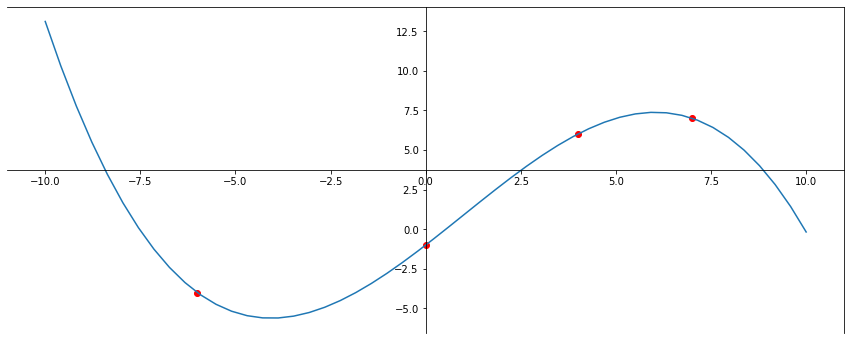

In [28]:
x = np.array([-6, 0, 4, 7]);
y = np.array([-4, -1, 6, 7]);
p = interpolacao_linear(x, y);

# Cria quadro
fig, ax = plt.subplots(1,1, figsize=(15,6));

# intervalo
t = np.linspace(-10, 10);
pt = np.polyval(p, t);

# Centralizar eixos
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Plot time
ax.plot(x, y, 'ro', t, pt);

plt.show();

## Interpolação com Lagrange

A interpolação també pode ser obtida a partir da fórmula de Lagrange.

$P_n(x) = \sum_{i=0}^n y_i * l_i(x)$

Em que $l_i$ é:

$li = \prod_{i=0, i \neq j}^n (x - x_j) / (x_i - x_j)$

O significado de $l_i$ é:

$L_i(x_j)=\left\{\begin{matrix}
  0 & se & i \neq j \\
  1 & se & i = j \\ 
\end{matrix}\right.$

In [ ]:
from scipy.interpolate import lagrange


## Splines
